# 1. Import library yang diperlukan

- Import library

In [1]:
import os
import joblib
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# 2. Memuat dan mengolah data

- Import dataset dari folder yang telah ditentukan

In [2]:
dataset_path = 'Data csv'
csv_file = 'df_10_subject.csv'

df_file_path = os.path.join(dataset_path, csv_file)

df = pd.read_csv(df_file_path)

- Menampilkan informasi terkait dataset

In [3]:
df

,Subject,EAR,Person Status,Person Type
0,10,0.115744,awake,glasses
1,10,0.137296,awake,glasses
2,10,0.103291,awake,glasses
3,10,0.124150,awake,glasses
4,10,0.097851,awake,glasses
...,...,...,...,...
19195,9,0.178450,drowsy,no-glasses
19196,9,0.153190,drowsy,no-glasses
19197,9,0.165020,drowsy,no-glasses
19198,9,0.123640,drowsy,no-glasses


- Membuat dataframe baru berdasarkan dataframe aslinya

In [4]:
value_to_locate = 'glasses'
filtered_rows = df[df['Person Type'] == value_to_locate]

# Remove the filtered rows from the original dataframe
df_no_glasses = df.drop(filtered_rows.index)

print(df_no_glasses)

       Subject       EAR Person Status Person Type
4800        10  0.218552         awake  no-glasses
4801        10  0.208033         awake  no-glasses
4802        10  0.237545         awake  no-glasses
4803        10  0.193500         awake  no-glasses
4804        10  0.231138         awake  no-glasses
...        ...       ...           ...         ...
19195        9  0.178450        drowsy  no-glasses
19196        9  0.153190        drowsy  no-glasses
19197        9  0.165020        drowsy  no-glasses
19198        9  0.123640        drowsy  no-glasses
19199        9  0.145185        drowsy  no-glasses

[9600 rows x 4 columns]


In [5]:
value_to_locate = 'no-glasses'
filtered_rows = df[df['Person Type'] == value_to_locate]

# Remove the filtered rows from the original dataframe
df_glasses = df.drop(filtered_rows.index)

print(df_glasses)

       Subject       EAR Person Status Person Type
0           10  0.115744         awake     glasses
1           10  0.137296         awake     glasses
2           10  0.103291         awake     glasses
3           10  0.124150         awake     glasses
4           10  0.097851         awake     glasses
...        ...       ...           ...         ...
14395        9  0.187430        drowsy     glasses
14396        9  0.207402        drowsy     glasses
14397        9  0.220129        drowsy     glasses
14398        9  0.196153        drowsy     glasses
14399        9  0.199381        drowsy     glasses

[9600 rows x 4 columns]


In [7]:
value_to_locate = 'drowsy'
filtered_rows = df[df['Person Status'] == value_to_locate]

# Remove the filtered rows from the original dataframe
df_awake = df.drop(filtered_rows.index)

print(df_awake)

      Subject       EAR Person Status Person Type
0          10  0.115744         awake     glasses
1          10  0.137296         awake     glasses
2          10  0.103291         awake     glasses
3          10  0.124150         awake     glasses
4          10  0.097851         awake     glasses
...       ...       ...           ...         ...
9595        9  0.251425         awake  no-glasses
9596        9  0.256974         awake  no-glasses
9597        9  0.267311         awake  no-glasses
9598        9  0.249381         awake  no-glasses
9599        9  0.233340         awake  no-glasses

[9600 rows x 4 columns]


In [8]:
value_to_locate = 'awake'
filtered_rows = df[df['Person Status'] == value_to_locate]

# Remove the filtered rows from the original dataframe
df_drowsy = df.drop(filtered_rows.index)

print(df_drowsy)

       Subject       EAR Person Status Person Type
9600        10  0.136543        drowsy     glasses
9601        10  0.160911        drowsy     glasses
9602        10  0.142509        drowsy     glasses
9603        10  0.122610        drowsy     glasses
9604        10  0.145340        drowsy     glasses
...        ...       ...           ...         ...
19195        9  0.178450        drowsy  no-glasses
19196        9  0.153190        drowsy  no-glasses
19197        9  0.165020        drowsy  no-glasses
19198        9  0.123640        drowsy  no-glasses
19199        9  0.145185        drowsy  no-glasses

[9600 rows x 4 columns]


- Membuat fungsi `separator` untuk membuat batas pemisah pada kode

In [9]:
def separator(phrase, line_length):
    # Calculate the length of hyphens on each side of the phrase
    hyphen_length = (line_length - len(phrase)) // 2

    # Create the separator line
    separator_line = "-" * hyphen_length + phrase + "-" * hyphen_length

    # If the length of the phrase and hyphens combined is less than the total line length,
    # add an extra hyphen to the right side
    if len(separator_line) < line_length:
        separator_line += "-"
    
    print(separator_line)

- Menampilkan informasi statistik dan histogram nilai EAR untuk setiap subjek dengan kategori menggunakan kacamata (`glasses`)

-----------------------------------Information for Subject 1------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       1.0    0.224446
std        0.0    0.043179
min        1.0    0.082802
25%        1.0    0.196219
50%        1.0    0.227100
75%        1.0    0.256950
max        1.0    0.322312


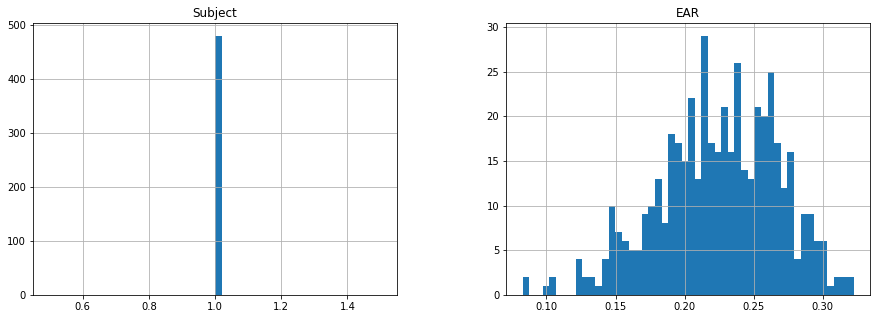

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       1.0    0.222083
std        0.0    0.038775
min        1.0    0.083535
25%        1.0    0.195969
50%        1.0    0.222346
75%        1.0    0.254026
max        1.0    0.296455


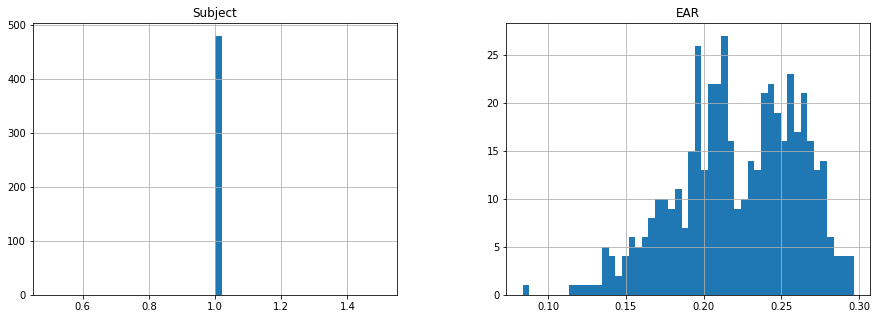

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 2------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       2.0    0.234000
std        0.0    0.027707
min        2.0    0.157022
25%        2.0    0.217950
50%        2.0    0.235925
75%        2.0    0.255681
max        2.0    0.305943


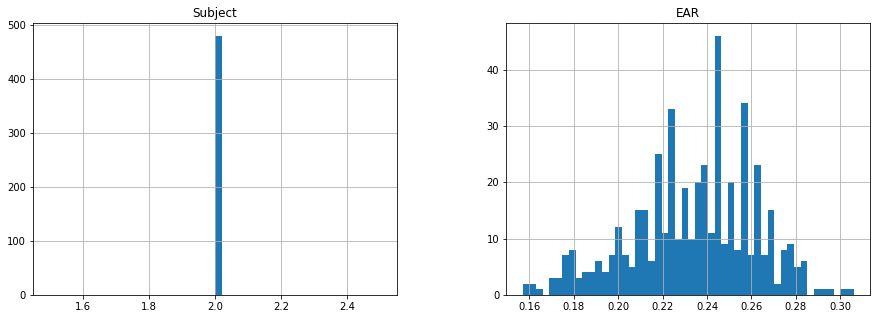

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       2.0    0.175956
std        0.0    0.018255
min        2.0    0.125522
25%        2.0    0.164497
50%        2.0    0.175306
75%        2.0    0.188249
max        2.0    0.235138


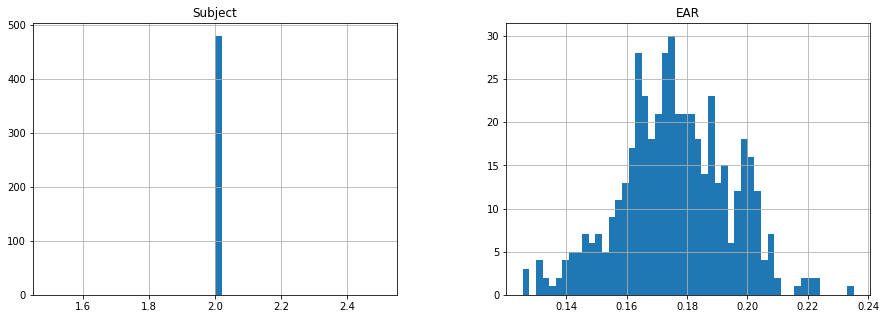

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 3------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       3.0    0.223122
std        0.0    0.027143
min        3.0    0.154857
25%        3.0    0.203243
50%        3.0    0.221672
75%        3.0    0.237672
max        3.0    0.304945


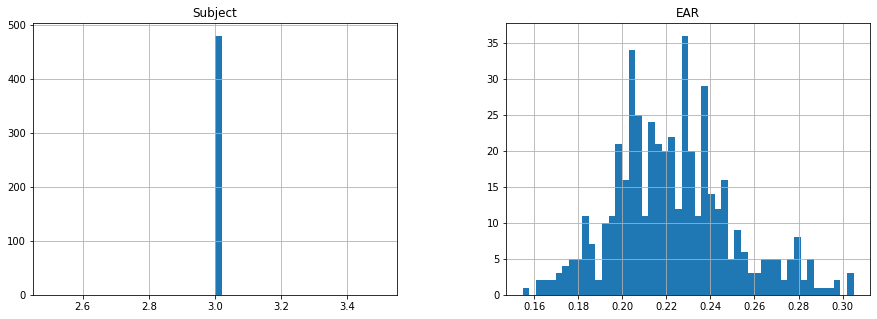

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       3.0    0.168362
std        0.0    0.021550
min        3.0    0.115355
25%        3.0    0.155168
50%        3.0    0.166989
75%        3.0    0.181883
max        3.0    0.230625


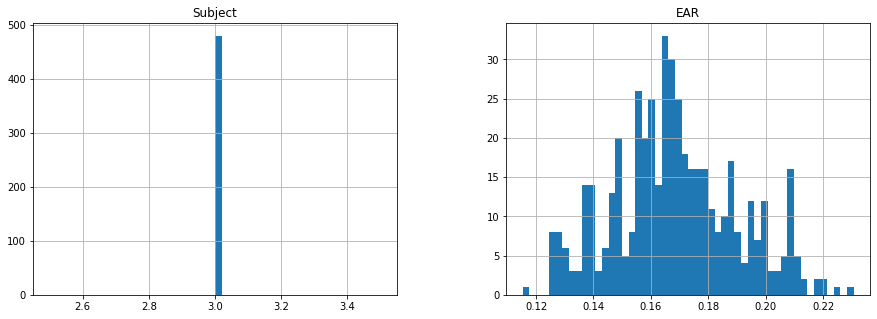

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 4------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       4.0    0.265968
std        0.0    0.028757
min        4.0    0.176423
25%        4.0    0.247338
50%        4.0    0.266434
75%        4.0    0.286436
max        4.0    0.326625


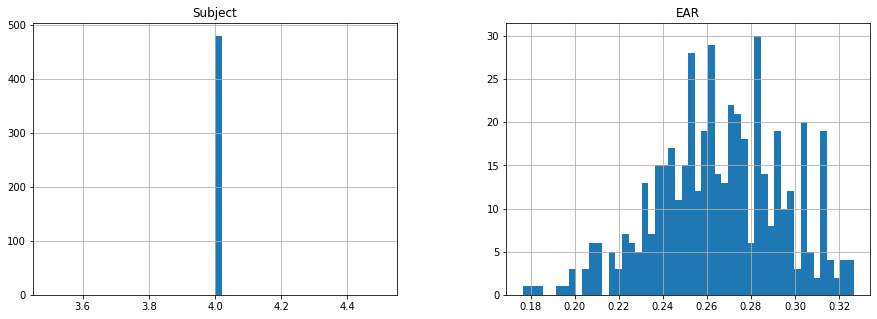

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       4.0    0.195944
std        0.0    0.018093
min        4.0    0.140293
25%        4.0    0.181719
50%        4.0    0.197962
75%        4.0    0.209941
max        4.0    0.235873


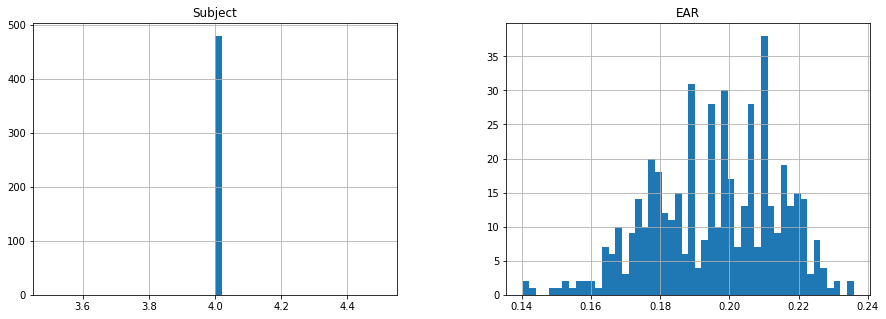

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 5------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       5.0    0.213076
std        0.0    0.041336
min        5.0    0.082212
25%        5.0    0.187736
50%        5.0    0.213678
75%        5.0    0.245209
max        5.0    0.301881


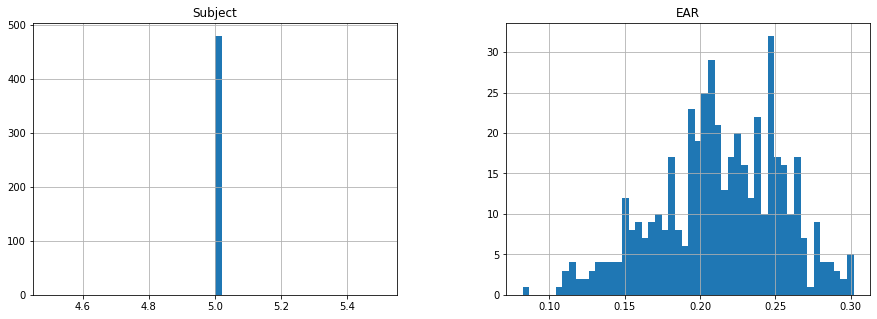

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       5.0    0.159865
std        0.0    0.034361
min        5.0    0.039874
25%        5.0    0.138995
50%        5.0    0.161745
75%        5.0    0.179599
max        5.0    0.252755


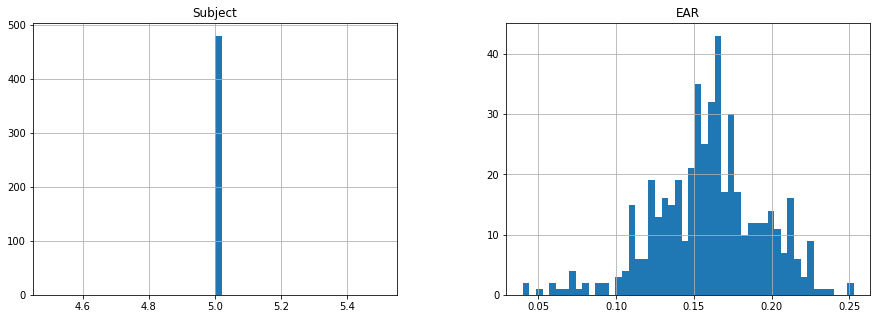

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 6------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       6.0    0.255957
std        0.0    0.027661
min        6.0    0.148344
25%        6.0    0.244460
50%        6.0    0.257659
75%        6.0    0.275690
max        6.0    0.310078


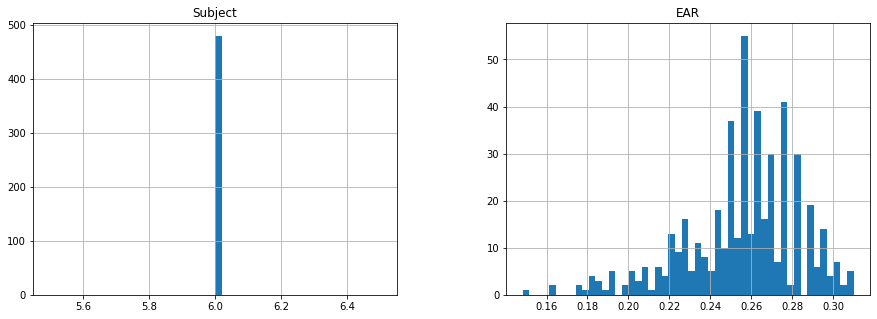

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       6.0    0.182074
std        0.0    0.020325
min        6.0    0.028969
25%        6.0    0.166507
50%        6.0    0.182922
75%        6.0    0.195966
max        6.0    0.241360


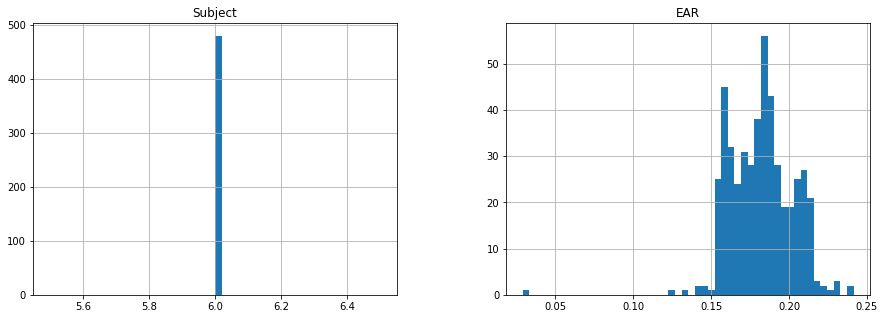

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 7------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       7.0    0.203915
std        0.0    0.030224
min        7.0    0.102239
25%        7.0    0.180242
50%        7.0    0.206406
75%        7.0    0.226313
max        7.0    0.308143


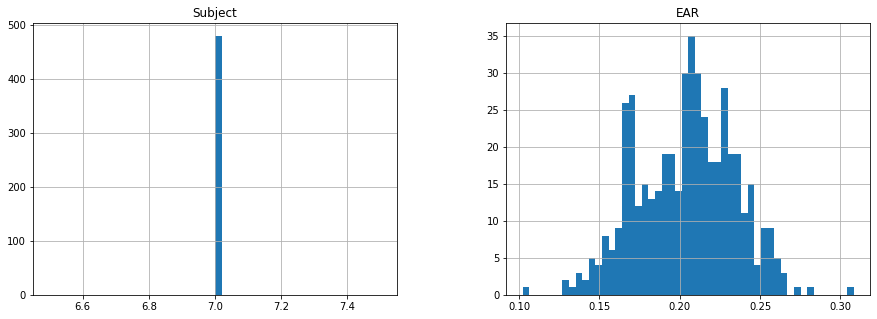

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       7.0    0.176997
std        0.0    0.022034
min        7.0    0.117549
25%        7.0    0.163415
50%        7.0    0.178932
75%        7.0    0.192887
max        7.0    0.236601


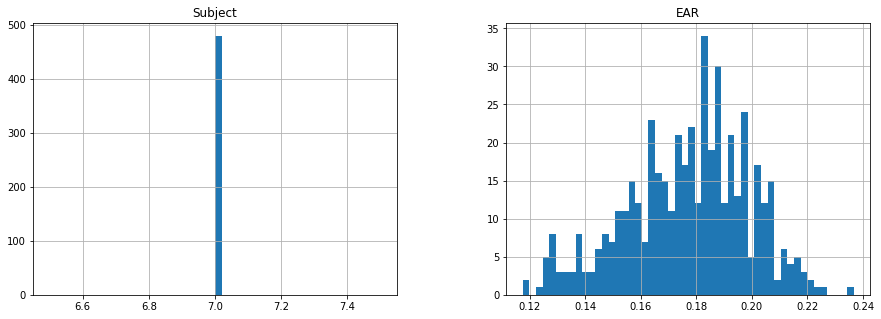

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 8------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       8.0    0.286512
std        0.0    0.039115
min        8.0    0.142221
25%        8.0    0.271792
50%        8.0    0.296719
75%        8.0    0.312969
max        8.0    0.355441


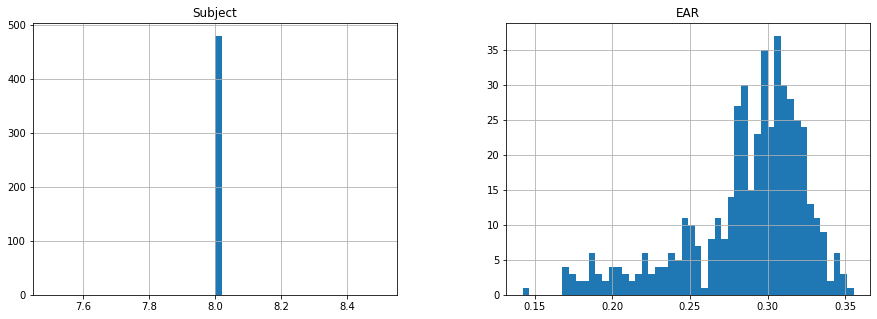

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       8.0    0.231392
std        0.0    0.024379
min        8.0    0.157545
25%        8.0    0.213700
50%        8.0    0.230440
75%        8.0    0.251047
max        8.0    0.290017


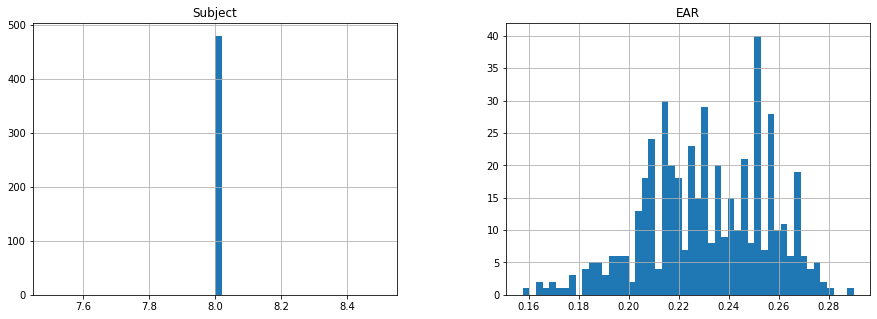

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 9------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       9.0    0.188717
std        0.0    0.025513
min        9.0    0.123405
25%        9.0    0.171956
50%        9.0    0.189347
75%        9.0    0.206445
max        9.0    0.251899


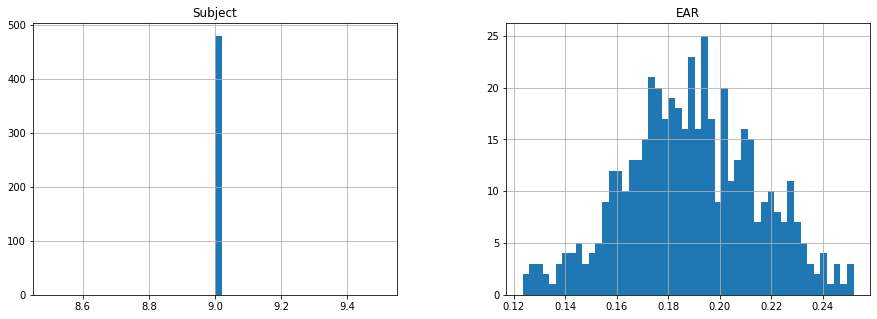

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       9.0    0.181538
std        0.0    0.023801
min        9.0    0.103574
25%        9.0    0.163421
50%        9.0    0.187282
75%        9.0    0.200686
max        9.0    0.231184


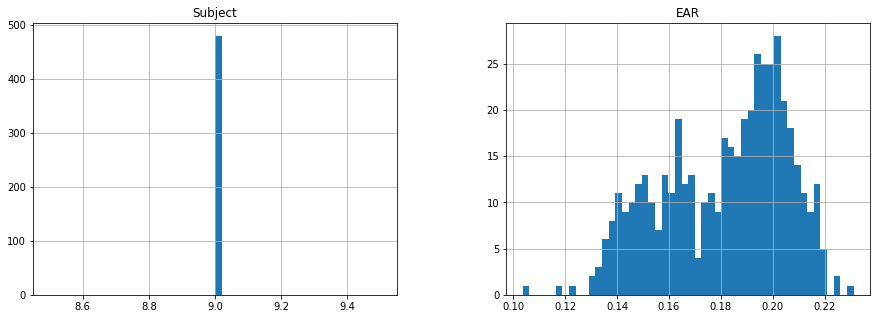

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 10-----------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean      10.0    0.136400
std        0.0    0.037193
min       10.0    0.022532
25%       10.0    0.115061
50%       10.0    0.135498
75%       10.0    0.155699
max       10.0    0.319740


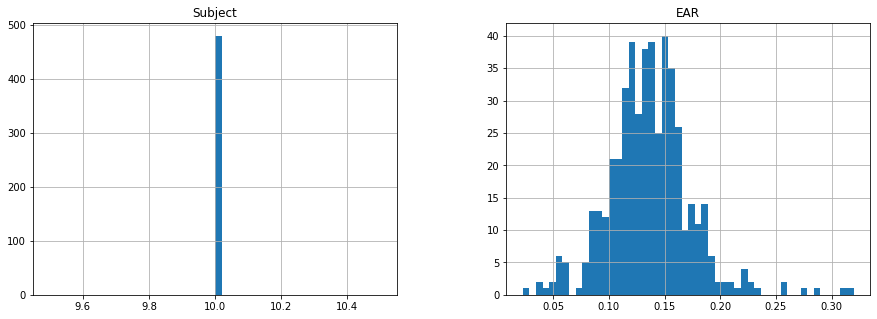

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean      10.0    0.150203
std        0.0    0.021930
min       10.0    0.081843
25%       10.0    0.135502
50%       10.0    0.150069
75%       10.0    0.161847
max       10.0    0.227875


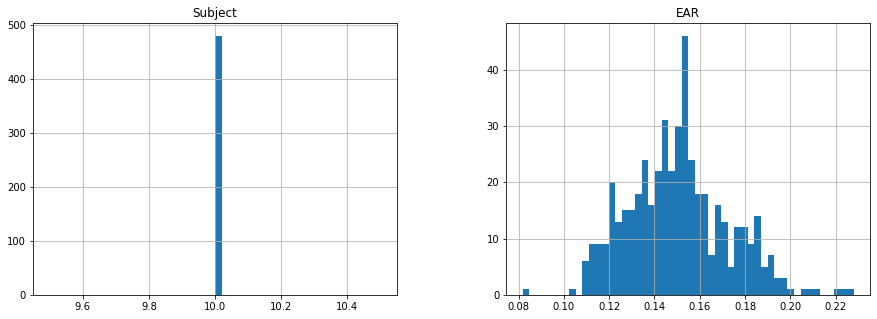

-------------------------------------this is separator line-------------------------------------


In [7]:
# Create an empty dictionary to store DataFrames
df_glasses_dictionary = {}

for i in range(1, 11):
    
    separator(f'Information for Subject {i}', 96)
    
    # Filter the DataFrame and assign it to a variable
    filtered_df = df_glasses[df_glasses['Subject'] == i]
    
    # Use a dictionary to store the filtered DataFrame
    df_glasses_dictionary[f'df_glasses_{i}'] = filtered_df
    
    # Optionally, you can print the DataFrame
    #print(df_glasses_dictionary[f'df_glasses_{i}'])
    
    callable_name = df_glasses_dictionary[f'df_glasses_{i}']
    
    awake_data = callable_name[callable_name['Person Status'] == 'awake']
    drowsy_data = callable_name[callable_name['Person Status'] == 'drowsy']
    
    print('awake statistic\n',awake_data.describe())
    awake_data.hist(bins=50, figsize=(15,5))
    plt.show()
    
    separator('this is separator line', 96)
    
    print('drowsy statistic\n',drowsy_data.describe())
    drowsy_data.hist(bins=50, figsize=(15,5))
    plt.show()
    
    separator('this is separator line', 96)

- Menampilkan informasi statistik dan histogram nilai EAR untuk setiap subjek dengan kategori tanpa menggunakan kacamata (`no-glasses`)

-----------------------------------Information for Subject 1------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       1.0    0.256172
std        0.0    0.029056
min        1.0    0.169320
25%        1.0    0.236750
50%        1.0    0.256657
75%        1.0    0.277461
max        1.0    0.317318


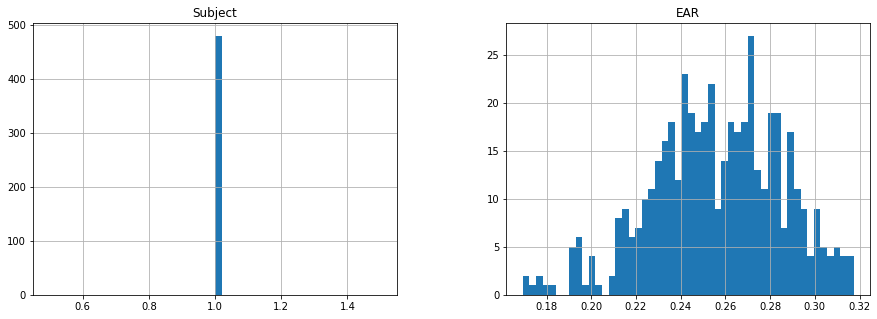

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       1.0    0.188418
std        0.0    0.014691
min        1.0    0.155995
25%        1.0    0.179752
50%        1.0    0.188368
75%        1.0    0.196803
max        1.0    0.266467


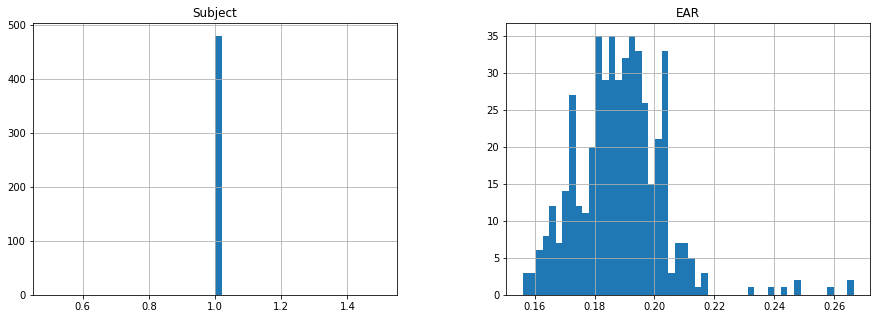

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 2------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       2.0    0.184674
std        0.0    0.029631
min        2.0    0.109523
25%        2.0    0.163154
50%        2.0    0.181455
75%        2.0    0.205017
max        2.0    0.277936


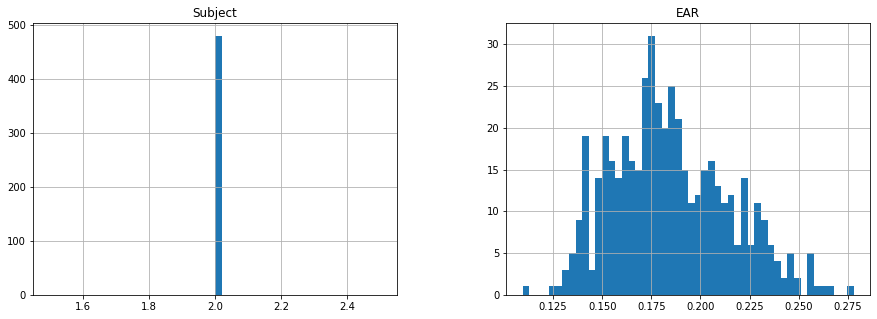

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       2.0    0.145932
std        0.0    0.016596
min        2.0    0.099247
25%        2.0    0.134881
50%        2.0    0.144890
75%        2.0    0.156435
max        2.0    0.203498


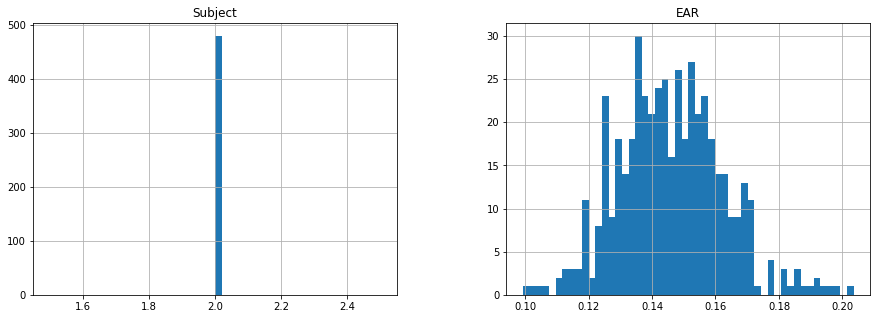

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 3------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       3.0    0.210542
std        0.0    0.028856
min        3.0    0.127992
25%        3.0    0.190652
50%        3.0    0.207091
75%        3.0    0.231138
max        3.0    0.320988


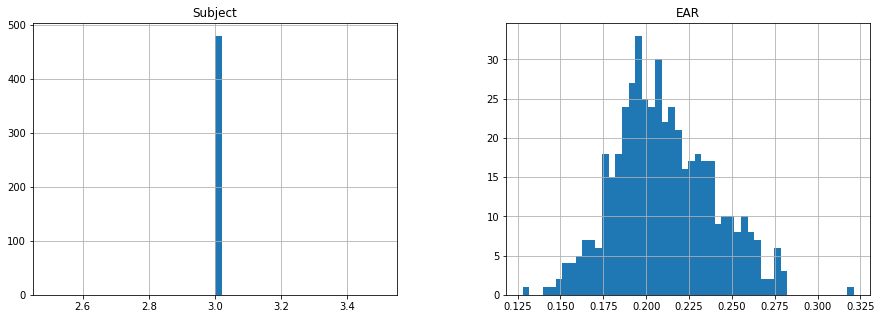

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       3.0    0.148119
std        0.0    0.021405
min        3.0    0.090751
25%        3.0    0.131686
50%        3.0    0.148871
75%        3.0    0.163342
max        3.0    0.206366


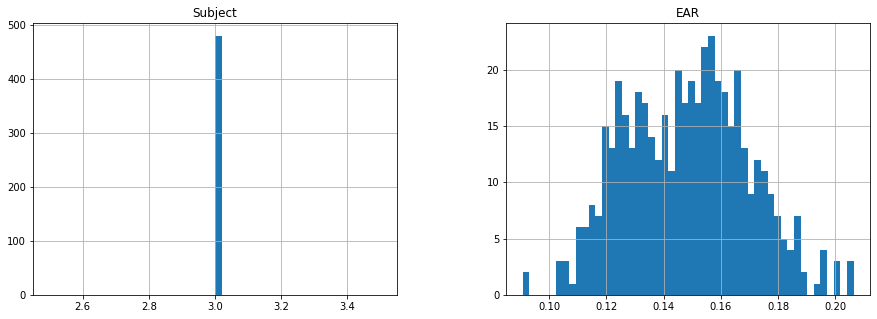

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 4------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       4.0    0.235953
std        0.0    0.028067
min        4.0    0.108749
25%        4.0    0.219013
50%        4.0    0.238862
75%        4.0    0.255967
max        4.0    0.312682


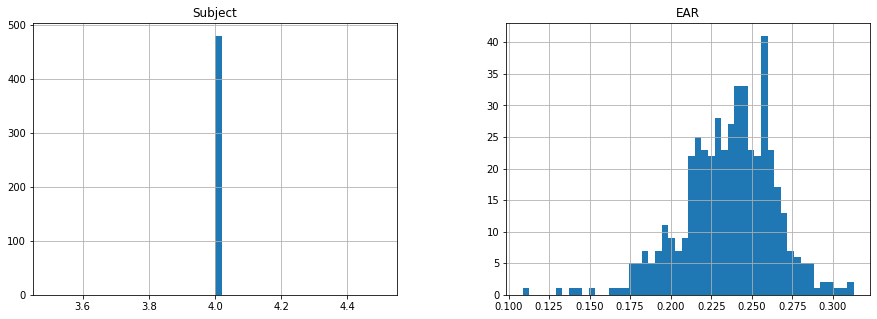

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       4.0    0.175082
std        0.0    0.013163
min        4.0    0.140476
25%        4.0    0.165522
50%        4.0    0.175531
75%        4.0    0.184289
max        4.0    0.214104


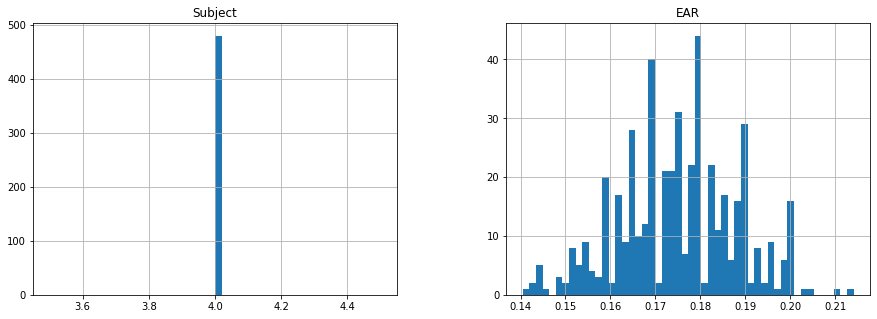

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 5------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       5.0    0.183393
std        0.0    0.048205
min        5.0    0.085936
25%        5.0    0.146278
50%        5.0    0.175043
75%        5.0    0.217011
max        5.0    0.308711


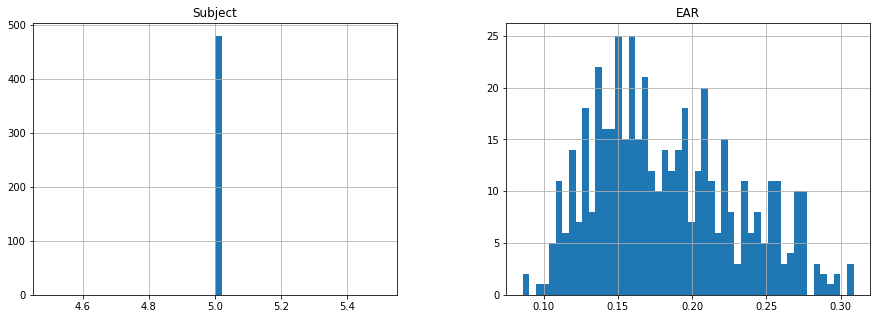

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       5.0    0.156986
std        0.0    0.034799
min        5.0    0.080877
25%        5.0    0.129676
50%        5.0    0.148666
75%        5.0    0.184939
max        5.0    0.290618


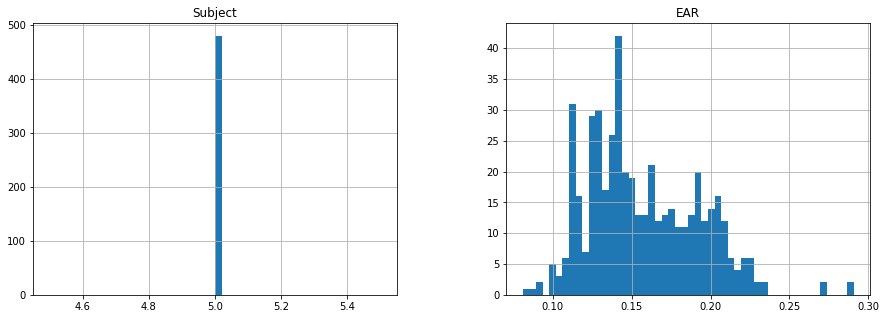

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 6------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       6.0    0.248324
std        0.0    0.024346
min        6.0    0.170387
25%        6.0    0.234576
50%        6.0    0.250476
75%        6.0    0.264296
max        6.0    0.304888


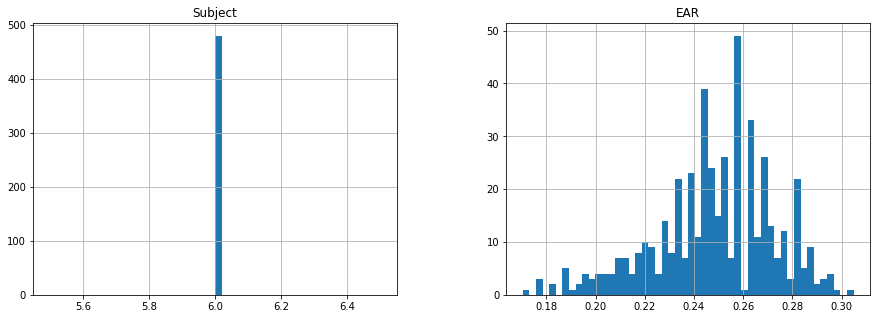

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       6.0    0.190237
std        0.0    0.019628
min        6.0    0.120004
25%        6.0    0.176325
50%        6.0    0.193866
75%        6.0    0.206298
max        6.0    0.236722


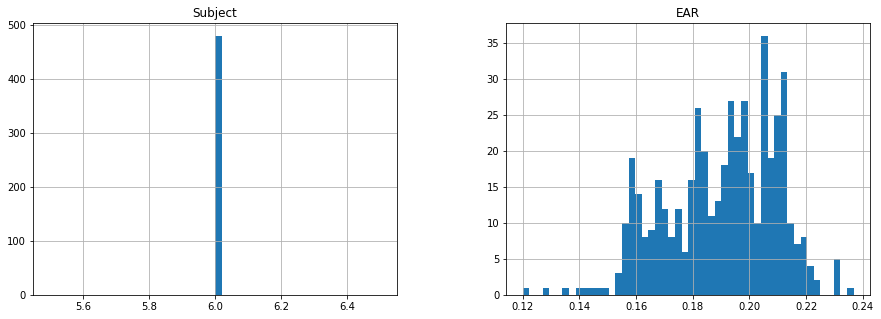

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 7------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       7.0    0.245855
std        0.0    0.019467
min        7.0    0.175829
25%        7.0    0.233992
50%        7.0    0.247301
75%        7.0    0.257457
max        7.0    0.299614


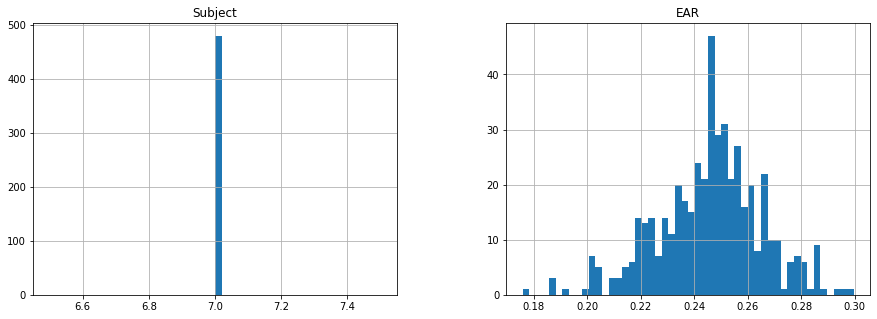

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       7.0    0.187649
std        0.0    0.020042
min        7.0    0.134427
25%        7.0    0.174498
50%        7.0    0.188128
75%        7.0    0.203001
max        7.0    0.235677


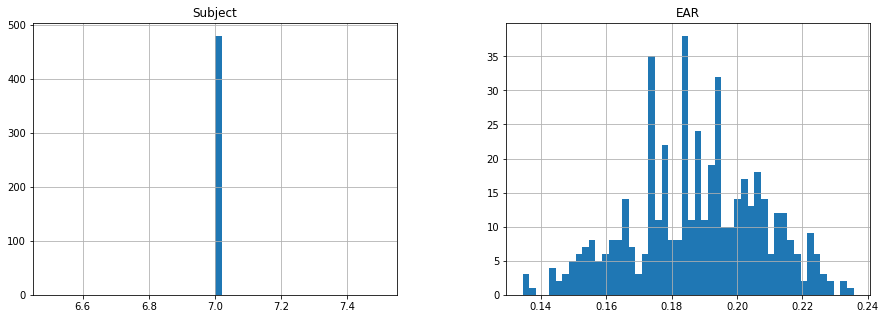

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 8------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       8.0    0.273114
std        0.0    0.033943
min        8.0    0.174603
25%        8.0    0.250528
50%        8.0    0.279459
75%        8.0    0.299241
max        8.0    0.351405


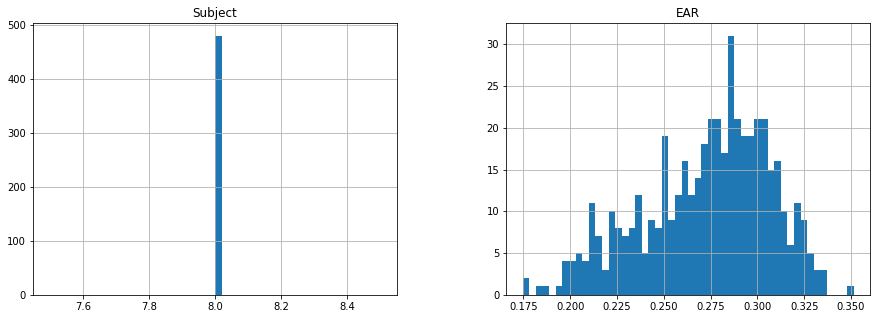

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       8.0    0.228684
std        0.0    0.014706
min        8.0    0.185564
25%        8.0    0.217392
50%        8.0    0.229373
75%        8.0    0.237673
max        8.0    0.272507


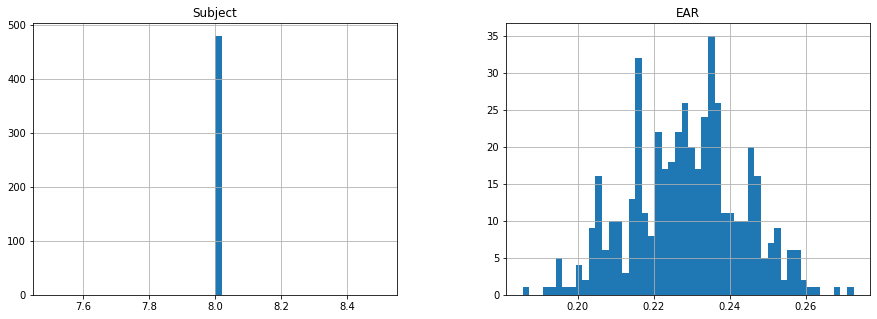

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 9------------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean       9.0    0.237272
std        0.0    0.030692
min        9.0    0.150918
25%        9.0    0.214085
50%        9.0    0.239831
75%        9.0    0.259352
max        9.0    0.328347


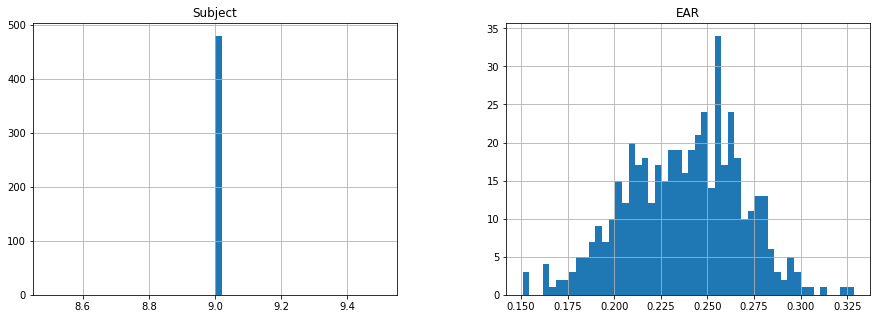

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean       9.0    0.154461
std        0.0    0.019573
min        9.0    0.104318
25%        9.0    0.139785
50%        9.0    0.153315
75%        9.0    0.169207
max        9.0    0.212381


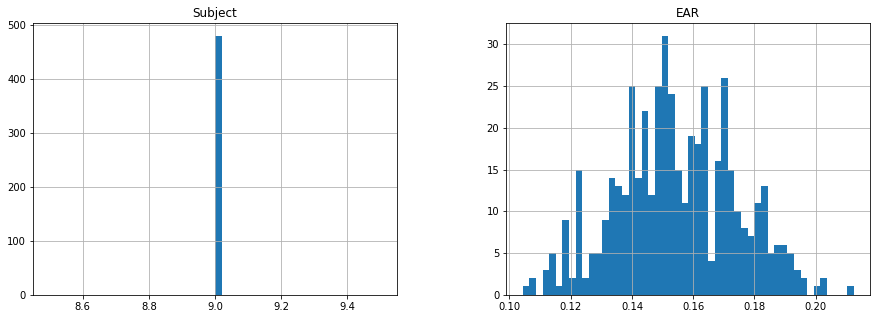

-------------------------------------this is separator line-------------------------------------
-----------------------------------Information for Subject 10-----------------------------------
awake statistic
        Subject         EAR
count    480.0  480.000000
mean      10.0    0.194295
std        0.0    0.031168
min       10.0    0.133700
25%       10.0    0.175262
50%       10.0    0.189674
75%       10.0    0.210291
max       10.0    0.384055


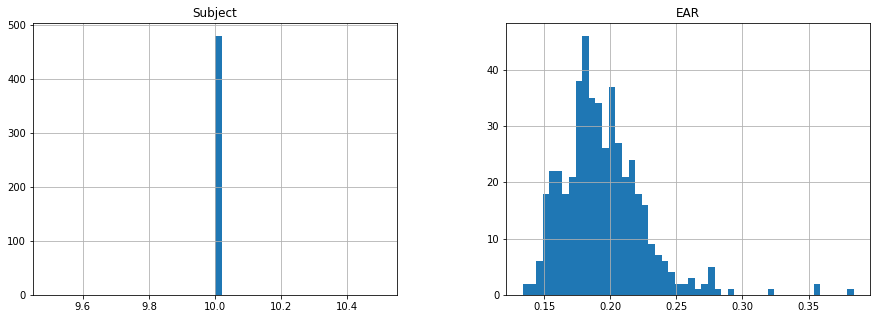

-------------------------------------this is separator line-------------------------------------
drowsy statistic
        Subject         EAR
count    480.0  480.000000
mean      10.0    0.178843
std        0.0    0.029889
min       10.0    0.053953
25%       10.0    0.157751
50%       10.0    0.176863
75%       10.0    0.204043
max       10.0    0.245119


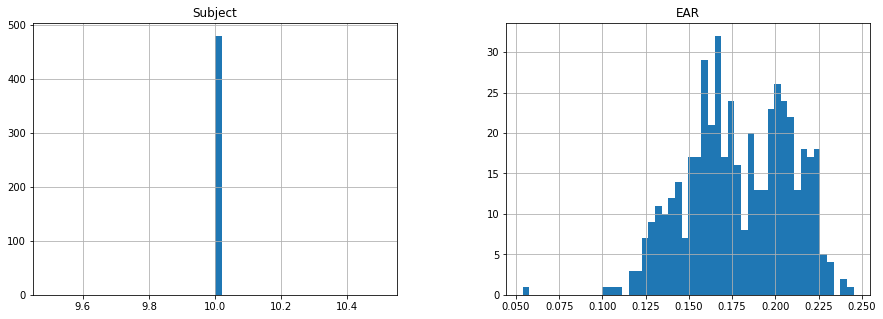

-------------------------------------this is separator line-------------------------------------


In [9]:
# Create an empty dictionary to store DataFrames
df_no_glasses_dictionary = {}

for i in range(1, 11):
    
    separator(f'Information for Subject {i}', 96)

    # Filter the DataFrame and assign it to a variable
    filtered_df = df_no_glasses[df_no_glasses['Subject'] == i]
    
    # Use a dictionary to store the filtered DataFrame
    df_no_glasses_dictionary[f'df_no_glasses_{i}'] = filtered_df
    
    # Optionally, you can print the DataFrame
    #print(df_no_glasses_dictionary[f'df_no_glasses_{i}'])
    
    callable_name = df_no_glasses_dictionary[f'df_no_glasses_{i}']
    
    awake_data = callable_name[callable_name['Person Status'] == 'awake']
    drowsy_data = callable_name[callable_name['Person Status'] == 'drowsy']
    
    print('awake statistic\n',awake_data.describe())
    awake_data.hist(bins=50, figsize=(15,5))
    plt.show()
    
    separator('this is separator line', 96)
    
    print('drowsy statistic\n',drowsy_data.describe())
    drowsy_data.hist(bins=50, figsize=(15,5))
    plt.show()
    
    separator('this is separator line', 96)

- Menampilkan histogram untuk keseluruhan subjek pada kategori subjek menggunakan kacamata (`glasses`)

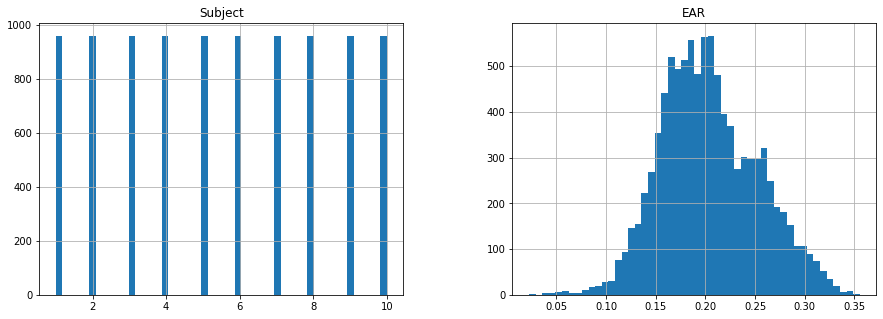

In [10]:
df_glasses.hist(bins=50, figsize=(15,5))
plt.show()

- Menampilkan histogram untuk keseluruhan subjek pada kategori subjek tanpa menggunakan kacamata (`no-glasses`)

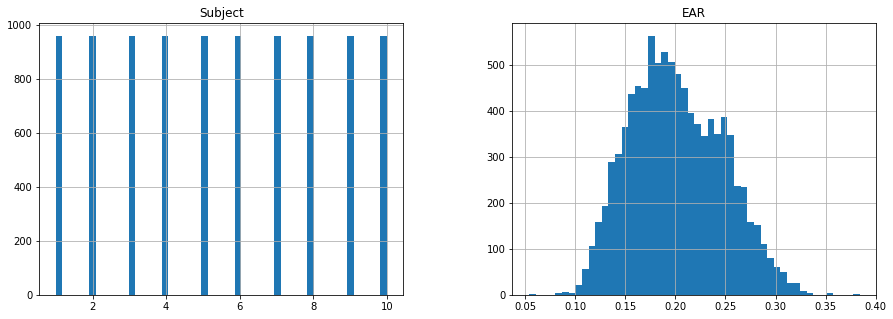

In [11]:
df_no_glasses.hist(bins=50, figsize=(15,5))
plt.show()

- Menampilkan histogram untuk keseluruhan subjek pada seluruh kategori (`glasses` dan `no-glasses`)

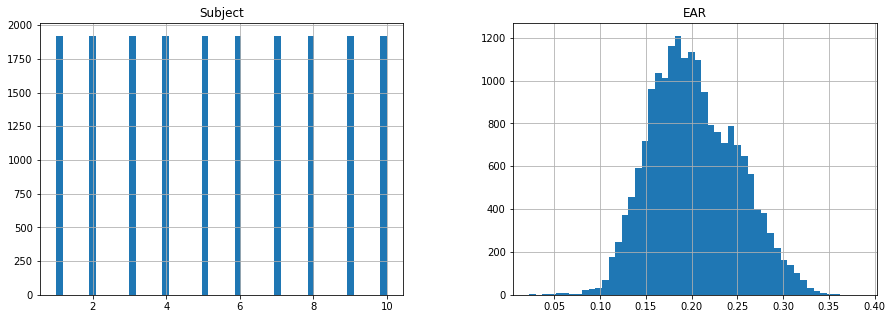

In [12]:
df.hist(bins=50, figsize=(15,5))
plt.show()

- Membuat histogram pada dataframe dengan label `awake`

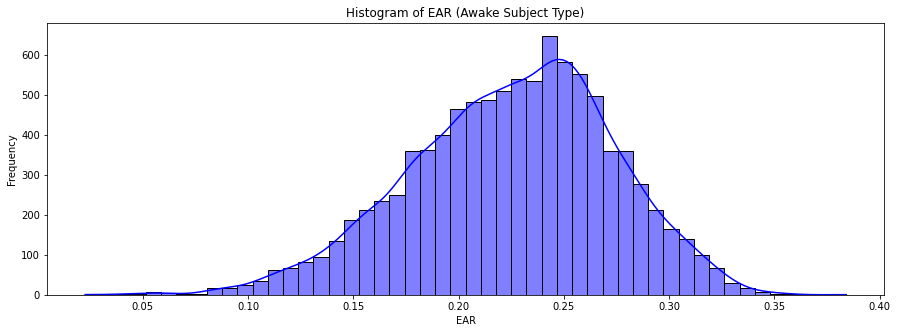

In [22]:
column_name = 'EAR (Awake Subject Type)'

# Set the figure size
plt.figure(figsize=(15, 5))  # Adjust the width and height as needed

# Plot histogram
sns.histplot(df_awake['EAR'], bins=50, kde=True, color='blue')

plt.title(f'Histogram of {column_name}')
plt.xlabel('EAR')
plt.ylabel('Frequency')

# Save the histogram to a local folder
output_path = r"D:\UGM\Teknik Fisika 18\[Someone]\Konten Skripsi\Gambar"  # Change this to your desired folder path
output_filename = f'{column_name}_histogram_new.png'
output_file_path = os.path.join(output_path, output_filename)

# Save the plot
plt.savefig(output_file_path)

# Show the plot (optional)
plt.show()

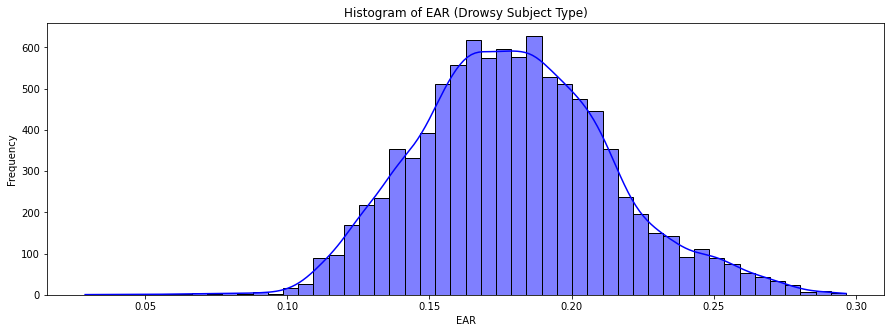

In [23]:
column_name = 'EAR (Drowsy Subject Type)'

# Set the figure size
plt.figure(figsize=(15, 5))  # Adjust the width and height as needed

# Plot histogram
sns.histplot(df_drowsy['EAR'], bins=50, kde=True, color='blue')

plt.title(f'Histogram of {column_name}')
plt.xlabel('EAR')
plt.ylabel('Frequency')

# Save the histogram to a local folder
output_path = r"D:\UGM\Teknik Fisika 18\[Someone]\Konten Skripsi\Gambar"  # Change this to your desired folder path
output_filename = f'{column_name}_histogram_new.png'
output_file_path = os.path.join(output_path, output_filename)

# Save the plot
plt.savefig(output_file_path)

# Show the plot (optional)
plt.show()

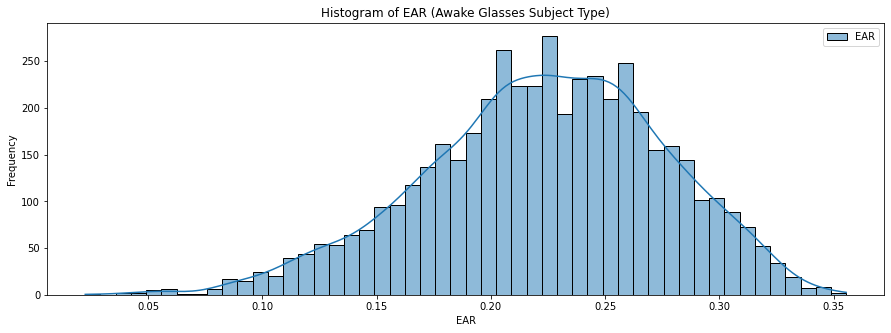

In [24]:
column_name = 'EAR (Awake Glasses Subject Type)'

filtered_df = df_awake.loc[df_awake['Person Type'] == 'glasses', ['EAR']]

# Set the figure size
plt.figure(figsize=(15, 5))  # Adjust the width and height as needed

# Plot histogram
sns.histplot(filtered_df, bins=50, kde=True, color='blue')

plt.title(f'Histogram of {column_name}')
plt.xlabel('EAR')
plt.ylabel('Frequency')

# Save the histogram to a local folder
output_path = r"D:\UGM\Teknik Fisika 18\[Someone]\Konten Skripsi\Gambar"  # Change this to your desired folder path
output_filename = f'{column_name}_histogram_new.png'
output_file_path = os.path.join(output_path, output_filename)

# Save the plot
plt.savefig(output_file_path)

# Show the plot (optional)
plt.show()

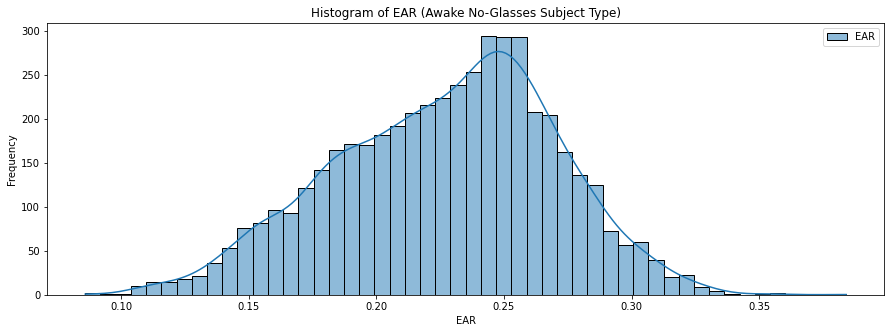

In [25]:
column_name = 'EAR (Awake No-Glasses Subject Type)'

filtered_df = df_awake.loc[df_awake['Person Type'] == 'no-glasses', ['EAR']]

# Set the figure size
plt.figure(figsize=(15, 5))  # Adjust the width and height as needed

# Plot histogram
sns.histplot(filtered_df, bins=50, kde=True, color='blue')

plt.title(f'Histogram of {column_name}')
plt.xlabel('EAR')
plt.ylabel('Frequency')

# Save the histogram to a local folder
output_path = r"D:\UGM\Teknik Fisika 18\[Someone]\Konten Skripsi\Gambar"  # Change this to your desired folder path
output_filename = f'{column_name}_histogram_new.png'
output_file_path = os.path.join(output_path, output_filename)

# Save the plot
plt.savefig(output_file_path)

# Show the plot (optional)
plt.show()

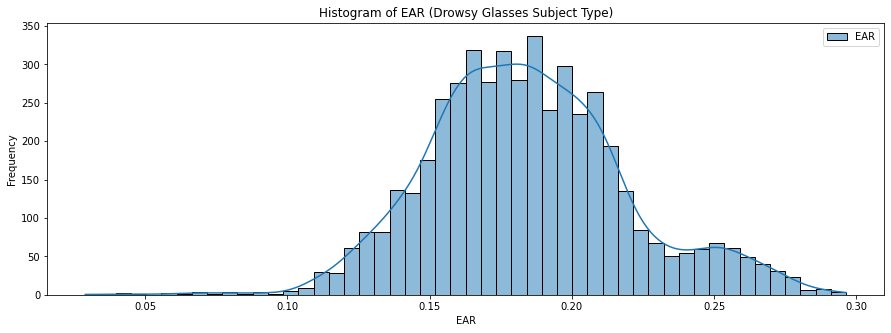

In [26]:
column_name = 'EAR (Drowsy Glasses Subject Type)'

filtered_df = df_drowsy.loc[df_drowsy['Person Type'] == 'glasses', ['EAR']]

# Set the figure size
plt.figure(figsize=(15, 5))  # Adjust the width and height as needed

# Plot histogram
sns.histplot(filtered_df, bins=50, kde=True, color='blue')

plt.title(f'Histogram of {column_name}')
plt.xlabel('EAR')
plt.ylabel('Frequency')

# Save the histogram to a local folder
output_path = r"D:\UGM\Teknik Fisika 18\[Someone]\Konten Skripsi\Gambar"  # Change this to your desired folder path
output_filename = f'{column_name}_histogram_new.png'
output_file_path = os.path.join(output_path, output_filename)

# Save the plot
plt.savefig(output_file_path)

# Show the plot (optional)
plt.show()

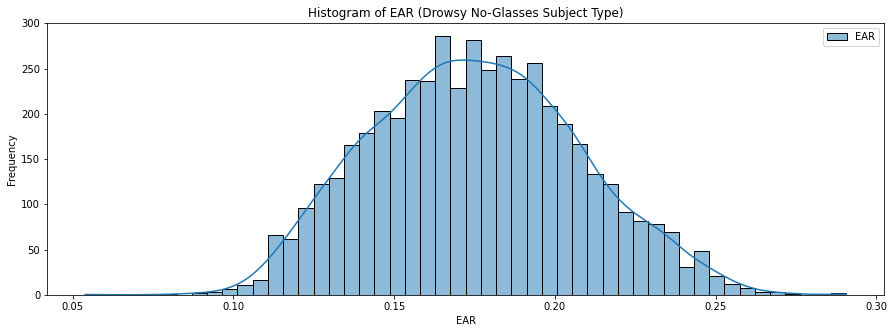

In [27]:
column_name = 'EAR (Drowsy No-Glasses Subject Type)'

filtered_df = df_drowsy.loc[df_drowsy['Person Type'] == 'no-glasses', ['EAR']]

# Set the figure size
plt.figure(figsize=(15, 5))  # Adjust the width and height as needed

# Plot histogram
sns.histplot(filtered_df, bins=50, kde=True, color='blue')

plt.title(f'Histogram of {column_name}')
plt.xlabel('EAR')
plt.ylabel('Frequency')

# Save the histogram to a local folder
output_path = r"D:\UGM\Teknik Fisika 18\[Someone]\Konten Skripsi\Gambar"  # Change this to your desired folder path
output_filename = f'{column_name}_histogram_new.png'
output_file_path = os.path.join(output_path, output_filename)

# Save the plot
plt.savefig(output_file_path)

# Show the plot (optional)
plt.show()

# 3. Pengolahan data lanjutan sebagai data latih dan data uji

- Membagi dataset menjadi data latih dan data uji untuk setiap dataframe yang ada (`glasses` dan `no-glasses`)

In [14]:
X = np.array(df_glasses["EAR"])
y = df_glasses["Person Status"]

X_train_glasses, X_test_glasses, y_train_glasses, y_test_glasses = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [15]:
X = np.array(df_no_glasses["EAR"])
y = df_no_glasses["Person Status"]

X_train_no_glasses, X_test_no_glasses, y_train_no_glasses, y_test_no_glasses = train_test_split(X, y, test_size = 0.2, random_state = 123)

- Menggabungkan data latih dan data uji yang merupakan kombinasi dari setiap dataframe menjadi satu kesatuan

In [17]:
# Combine the arrays using numpy.concatenate()
X_train = np.concatenate((X_train_glasses, X_train_no_glasses))
X_test = np.concatenate((X_test_glasses, X_test_no_glasses))

# Combine the dataframes using pd.concat()
y_train = pd.concat([y_train_glasses, y_train_no_glasses], ignore_index=False)
y_test = pd.concat([y_test_glasses, y_test_no_glasses], ignore_index=False)

- Melakukan transformasi bentuk dari data latih dan data uji (`1 Dimensi` menjadi `2 Dimensi`)

In [18]:
X_train_g = X_train_glasses.reshape(-1,1)
X_train_ng = X_train_no_glasses.reshape(-1,1)

X_test_g = X_test_glasses.reshape(-1,1)
X_test_ng = X_test_no_glasses.reshape(-1,1)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

- Import `StandardScaler()` dan dilatih menggunakan data latih keseluruhan

In [19]:
# Feature scaling
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

- Melakukan normalisasi pada data latih dan data uji untuk setiap kategori menggunakan `StandardScaler()`

In [20]:
X_train_g_scaled = scaler.transform(X_train_g)
X_train_ng_scaled = scaler.transform(X_train_ng)

X_test_g_scaled = scaler.transform(X_test_g)
X_test_ng_scaled = scaler.transform(X_test_ng)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Menggabungkan data latih dan data uji dalam sebuah list

In [27]:
data_type = ['glasses', 'no-glasses', 'combined']
train_data = [X_train_g_scaled, X_train_ng_scaled, X_train_scaled]
test_data = [X_test_g_scaled, X_test_ng_scaled, X_test_scaled]

train_label = [y_train_glasses, y_train_no_glasses, y_train]
test_label = [y_test_glasses, y_test_no_glasses, y_test]

# 4. Menyiapkan model SVM

- Menentukan konfigurasi hyperparameter pada model SVM

In [21]:
# SVM hyperparameter
SVC_param = {
    'C' : [0.1, 1, 10],
    'gamma' : [0.01, 0.1, 1, 10],
    'kernel' : ['linear', 'rbf'],
    'probability' : [True]
}

- Mendeklarasikan variabel untuk memanggil setiap hyperparameter pada model SVM

In [22]:
C_value = SVC_param['C']
gamma_value = SVC_param['gamma']
kernel_value = SVC_param['kernel']

# 5. Pelatihan dan Pengujian Model

## 5.1. Metode `GridSearchCV`

- Membuat `dictionary` untuk menampung hasil pelatihan dan pengujian model menggunakan metode `GridSearchCV`

In [26]:
result_gridsearch = {}

- Melatih dan menguji model menggunakan metode `GridSearchCV`

In [39]:
# Record the start time
start_time = time.time()

# Initialize the SVC classifier
svc = SVC()

# Initialize GridSearchCV with the SVC classifier and parameter grid
grid_search = GridSearchCV(estimator=svc, param_grid=SVC_param, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print(f"Best Parameters on Train Set:", grid_search.best_params_)
print(f"Best Score on Train Set: {grid_search.best_score_*100:.2f}")

# Get the best SVC model from grid search
best_svc = grid_search.best_estimator_

for i, test in enumerate(test_data):
    
    type_of_data = data_type[i]

    # Evaluate the best model on the test set
    accuracy = best_svc.score(test, test_label[i])
    result_gridsearch[type_of_data] = f'{accuracy*100:.2f}'
    print(f"Accuracy of best model on Test Set for {type_of_data} data: {accuracy*100:.2f}")
# Record the end time
end_time = time.time()

# Calculate the elapsed time
total_time = end_time - start_time
# Print the total time taken
print(f"Total time taken for the process: {total_time:.2f} seconds")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters on Train Set: {'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True}
Best Score on Train Set: 73.42
Accuracy of best model on Test Set for glasses data: 71.51
Accuracy of best model on Test Set for no-glasses data: 74.79
Accuracy of best model on Test Set for combined data: 73.15
Total time taken for the process: 2089.58 seconds


- Menampilkan hasil pengujian menggunakan metode `GridSearchCV`

In [42]:
result_gridsearch

{'glasses': '71.51', 'no-glasses': '74.79', 'combined': '73.15'}

## 5.2. Metode `cross-validation` (hanya pada data latih)

- Memberikan nilai pada parameter dari teknik `cross-validation` 

In [44]:
# Specify the number of folds for cross-validation
num_folds = 5

# Create a cross-validation iterator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

- Membuat `list` untuk menampung hasil pelatihan dan pengujian model menggunakan teknik `cross-validation`

In [50]:
result_mean_accuracy_cv = []
result_std_cv = []

- Melatih dan menguji model menggunakan teknik `cross-validation` (menggunakan data latih)

In [51]:
# Record the start time
start_time = time.time()

# initiate the index value 
index = 1

# Perform cross-validation for each gamma value
for kernel in kernel_value:
    for c in C_value:
        for gamma in gamma_value:
            # Create an SVM classifier with current kernel, gamma, and C value
            svc = SVC(kernel=kernel, C=c, gamma=gamma)

            # Perform cross-validation
            cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=kf)

            # make print statement for display information in console
            print(f'{index}.')
            print(cv_scores)
            print("Kernel: {}, C: {}, Gamma: {}".format(kernel, c, gamma))
            
            mean_accuracy = "{:.2f}".format(np.mean(cv_scores)*100)
            std = "{:.3f}".format(np.std(cv_scores))
            
            result_mean_accuracy_cv.append(mean_accuracy)
            result_std_cv.append(std)
            
            # Print the mean score and standard deviation
            print(f"Mean accuracy: {mean_accuracy}")
            print(f"Standard deviation: {std}")
            print('')
            
            # Increment the index value
            index += 1
            
# Record the end time
end_time = time.time()

# Calculate the elapsed time
total_time = end_time - start_time

# Print the total time taken
print(f"Total time taken for the process: {total_time:.2f} seconds")

1.
[0.73535156 0.73763021 0.73307292 0.71354167 0.73502604]
Kernel: linear, C: 0.1, Gamma: 0.01
Mean accuracy: 73.09
Standard deviation: 0.009

2.
[0.73535156 0.73763021 0.73307292 0.71354167 0.73502604]
Kernel: linear, C: 0.1, Gamma: 0.1
Mean accuracy: 73.09
Standard deviation: 0.009

3.
[0.73535156 0.73763021 0.73307292 0.71354167 0.73502604]
Kernel: linear, C: 0.1, Gamma: 1
Mean accuracy: 73.09
Standard deviation: 0.009

4.
[0.73535156 0.73763021 0.73307292 0.71354167 0.73502604]
Kernel: linear, C: 0.1, Gamma: 10
Mean accuracy: 73.09
Standard deviation: 0.009

5.
[0.73535156 0.73697917 0.73372396 0.71354167 0.73502604]
Kernel: linear, C: 1, Gamma: 0.01
Mean accuracy: 73.09
Standard deviation: 0.009

6.
[0.73535156 0.73697917 0.73372396 0.71354167 0.73502604]
Kernel: linear, C: 1, Gamma: 0.1
Mean accuracy: 73.09
Standard deviation: 0.009

7.
[0.73535156 0.73697917 0.73372396 0.71354167 0.73502604]
Kernel: linear, C: 1, Gamma: 1
Mean accuracy: 73.09
Standard deviation: 0.009

8.
[0.73

- Menampilkan hasil berupa akurasi rata - rata dan standar deviasi pada teknik `cross-validation`

In [52]:
# Create a DataFrame
df_cross_validation = pd.DataFrame({
                                'Mean Accuracy': result_mean_accuracy_cv, 
                                'Standard Deviation': result_std_cv})

# Print the DataFrame
print(df_cross_validation)

   Mean Accuracy Standard Deviation
0          73.09              0.009
1          73.09              0.009
2          73.09              0.009
3          73.09              0.009
4          73.09              0.009
5          73.09              0.009
6          73.09              0.009
7          73.09              0.009
8          73.09              0.009
9          73.09              0.009
10         73.09              0.009
11         73.09              0.009
12         73.15              0.007
13         73.13              0.003
14         73.31              0.006
15         73.44              0.006
16         73.17              0.003
17         73.18              0.005
18         73.33              0.006
19         73.40              0.006
20         73.05              0.003
21         73.19              0.005
22         73.50              0.006
23         73.36              0.006


## 5.3. Metode Manual (One by One)

- Membuat fungsi `evaluate_model` untuk menampilkan dan menyimpan metriks evaluasi dari model

In [68]:
def evaluate_model(model, index, X_test_scaled, y_test, data_type, variation_folder):
    
    # predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Custom display labels
    labels = ['Awake', 'Drowsy']
    
    # create a heatmap visualization
    ax = sns.heatmap(cm, 
                     annot=True, 
                     fmt='d', 
                     xticklabels=labels, 
                     yticklabels=labels) # fmt='d' formats the numbers as digits, which means integers

    # Set labels for the axes
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')

    # Set title for the heatmap
    ax.set_title('Confusion Matrix')
    
    # file name for confusion_matrix
    conf_matrix_image = f'confusion_matrix_{index}_{data_type}.png'
    
    # file path to save the figure
    conf_matrix_path = os.path.join(variation_folder, conf_matrix_image)
    
    # save the figure to a file (e.g., in PNG format)
    plt.savefig(conf_matrix_path)
    
    # close the figure
    plt.close()
    
    # Redirect standard output to a file
    original_stdout = sys.stdout

    # define the classification report
    cr = classification_report(y_test, y_pred)
    
    # Define the file path where you want to save the txt file
    file_path = os.path.join(variation_folder, f'classification_report_{index}_{data_type}.txt')

    with open(file_path, 'w') as file:
        # Redirect standard output to the txt file
        sys.stdout = file

        # Print the classification report
        print(cr)

    # Restore standard output
    sys.stdout = original_stdout
    
    return print(cr)

- Membuat fungsi **save_hyperparams** untuk menyimpan _hyperparameter_ dari model

In [54]:
def save_hyperparams (kernel, c, gamma, variation_folder):
    
    # create a dataframe to store the hyperparameter value
    hyperparams_df = pd.DataFrame({
        'Hyperparameter': ['Kernel', 'C', 'Gamma'],
        'Value': [kernel, c, gamma]
    })
    
    # define the file path 
    hyperparams_file = 'hyperparameter_data.csv'
    hyperparams_path = os.path.join(variation_folder, hyperparams_file)
    
    # save the hyperparameter value to a CSV file
    hyperparams_df.to_csv(hyperparams_path, index=False)
    
    return

- Membuat folder untuk menyimpan variasi model yang akan dilakukan

In [56]:
# Save the trained model to a specified folder
model_folder = 'Models/Pelatihan_2'

if not os.path.exists(model_folder):
    os.makedirs(model_folder)

- Menjalankan proses pelatihan dan pengujian model dan menyimpan hasil yang diperoleh 

In [69]:
# Record the start time
start_time = time.time()

# initiate the index value 
index = 1

# Perform training for each hyperparameter value
for kernel in kernel_value:
    for c in C_value:
        for gamma in gamma_value:
            
            # create the variation folder path to save the model and scaler
            variation_folder = os.path.join(model_folder, f'variation_{index}')
            
            if not os.path.exists(variation_folder):
                os.makedirs(variation_folder)
            
            # Create an SVM classifier with current kernel, gamma, and C value
            svc = SVC(kernel=kernel, C=c, gamma=gamma)

            # train the model
            svc.fit(X_train_scaled, y_train)
            
            # Save the trained model to a specified folder
            model_path = os.path.join(variation_folder, f'svc_model_{index}.pkl')
            joblib.dump(svc, model_path)
    
            # Save the scaler to a file
            scaler_path = os.path.join(variation_folder, f'standar_scaler_{index}.pkl')
            joblib.dump(scaler, scaler_path)
            
            # make print statement for display information in console
            print(f'{index}.')
            print("Kernel: {}, C: {}, Gamma: {}".format(kernel, c, gamma))
            
            # save the hyperparamer value
            save_hyperparams (kernel, c, gamma, variation_folder)
            
            # evaluate the model
            evaluate_model(svc, index, test_data[0], test_label[0], data_type[0], variation_folder)
            evaluate_model(svc, index, test_data[1], test_label[1], data_type[1], variation_folder)
            evaluate_model(svc, index, test_data[2], test_label[2], data_type[2], variation_folder)
                   
            # increment the index
            index += 1
            
# Record the end time
end_time = time.time()

# Calculate the elapsed time
total_time = end_time - start_time

# Print the total time taken
print(f"Total time taken for the process: {total_time:.2f} seconds")

1.
Kernel: linear, C: 0.1, Gamma: 0.01
              precision    recall  f1-score   support

       awake       0.74      0.64      0.69       971
      drowsy       0.68      0.77      0.72       949

    accuracy                           0.71      1920
   macro avg       0.71      0.71      0.70      1920
weighted avg       0.71      0.71      0.70      1920

              precision    recall  f1-score   support

       awake       0.80      0.67      0.73       971
      drowsy       0.71      0.83      0.77       949

    accuracy                           0.75      1920
   macro avg       0.76      0.75      0.75      1920
weighted avg       0.76      0.75      0.75      1920

              precision    recall  f1-score   support

       awake       0.77      0.66      0.71      1942
      drowsy       0.70      0.80      0.74      1898

    accuracy                           0.73      3840
   macro avg       0.73      0.73      0.73      3840
weighted avg       0.73      0.73  

- Melatih model dengan konfigurasi hyperparameter terbaik menggunakan data normal (tanpa standarisasi)

In [131]:
 # Create an SVM classifier with current kernel, gamma, and C value
svc_raw = SVC(kernel='rbf', C=0.1, gamma=0.1)

# train the model
svc_raw.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1)

- Mencari nilai titik potong dari nilai EAR pada data EAR sebelum distandarisasi

In [133]:
svc_raw.intercept_

array([0.23892634])

## 5.4. Metode `Voting Classifier` (untuk meningkatkan akurasi)

- Mendeklarasikan algoritma klasifikasi yang digunakan untuk `Voting Classifier`

In [72]:
svm_clf = SVC(kernel='rbf', C=0.1, gamma=0.1, probability=True)
rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split=5, n_jobs=-1)
knn_clf = KNeighborsClassifier()
logreg_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()

- Mengkombinasikan algoritma - algoritma klasifikasi dalam sebuah `dictionary`

In [74]:
Classifier = {
    'svm': svm_clf,
    'rf': rf_clf,
    'knn': knn_clf,
    'logreg': logreg_clf,
    'dt': dt_clf
}

- Melakukan pelatihan pada setiap algoritma klasifikasi menggunakan data latih

In [75]:
for clf in Classifier:
    Classifier[clf].fit(X_train_scaled, y_train)

In [88]:
for clf in Classifier:
    print(clf)

svm
rf
knn
logreg
dt


- Mendefiniskan `list` untuk menampung hasil pengujian setiap algortima pada data uji

In [115]:
glasses_clf = []
no_glasses_clf = []
combined_clf = []
clf_name = []

result_clf = [glasses_clf, no_glasses_clf, combined_clf, clf_name]

In [116]:
print(result_clf)

[[], [], [], []]


- Melakukan pengujian pada setiap algoritma klasifikasi menggunakan data uji

In [117]:
for i, test in enumerate(test_data):
    print('')
    separator('',56)
    for clf in Classifier:
        type_of_data = data_type[i]

        # Evaluate model on the test set
        accuracy = Classifier[clf].score(test, test_label[i])
        
        result_clf[i].append(f'{accuracy*100:.2f}')
        
        clf_name.append(clf)
        
        print(f"Accuracy of {clf} classifer for {type_of_data} data: {accuracy*100:.2f}")


--------------------------------------------------------
Accuracy of svm classifer for glasses data: 72.14
Accuracy of rf classifer for glasses data: 70.47
Accuracy of knn classifer for glasses data: 69.69
Accuracy of logreg classifer for glasses data: 69.90
Accuracy of dt classifer for glasses data: 70.57

--------------------------------------------------------
Accuracy of svm classifer for no-glasses data: 74.64
Accuracy of rf classifer for no-glasses data: 73.23
Accuracy of knn classifer for no-glasses data: 74.79
Accuracy of logreg classifer for no-glasses data: 74.22
Accuracy of dt classifer for no-glasses data: 72.29

--------------------------------------------------------
Accuracy of svm classifer for combined data: 73.39
Accuracy of rf classifer for combined data: 71.85
Accuracy of knn classifer for combined data: 72.24
Accuracy of logreg classifer for combined data: 72.06
Accuracy of dt classifer for combined data: 71.43


- Menampilkan `dataframe` yang memuat hasil pengujian dari setiap algoritma klasifikasi untuk tiap data uji

In [118]:
# Create a DataFrame
df_clf = pd.DataFrame({'Classifier': clf_name[:5], 
                       'Accuracy_glasses': glasses_clf, 
                      'Accuracy_no_glasses': no_glasses_clf,
                      'Accuracy_combined': combined_clf
                      })

# Print the DataFrame
print(df_clf)

  Classifier Accuracy_glasses Accuracy_no_glasses Accuracy_combined
0        svm            72.14               74.64             73.39
1         rf            70.47               73.23             71.85
2        knn            69.69               74.79             72.24
3     logreg            69.90               74.22             72.06
4         dt            70.57               72.29             71.43


- Membuat `Voting Classifier` memuat multi-algoritma klasifikasi dengan parameter `voting = hard`

In [125]:
voting_clf_hard = VotingClassifier([
    ('svm', svm_clf),
    ('rf', rf_clf),
    ('knn', knn_clf),
    ('logreg', logreg_clf),
    ('dt', dt_clf)
], voting='hard')

- Melatih `Voting Classifer (hard)`

In [126]:
voting_clf_hard.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('svm', SVC(C=0.1, gamma=0.1, probability=True)),
                             ('rf',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_jobs=-1)),
                             ('knn', KNeighborsClassifier()),
                             ('logreg', LogisticRegression()),
                             ('dt', DecisionTreeClassifier())])

- Menguji `Voting Classifier (hard)` pada setiap data uji

In [121]:
for i, test in enumerate(test_data):
        type_of_data = data_type[i]

        # Evaluate model on the test set
        accuracy = voting_clf_hard.score(test, test_label[i])
        
        result_clf[i].append(f'{accuracy*100:.2f}')
        
        clf_name.insert(5,'hard voting')
        
        print(f"Accuracy of hard voting classifer for {type_of_data} data: {accuracy*100:.2f}")

Accuracy of hard voting classifer for glasses data: 72.45
Accuracy of hard voting classifer for no-glasses data: 76.61
Accuracy of hard voting classifer for combined data: 74.53


- Membuat `Voting Classifier` memuat multi-algoritma klasifikasi dengan parameter `voting = soft`

In [124]:
voting_clf_soft = VotingClassifier([
    ('svm', svm_clf),
    ('rf', rf_clf),
    ('knn', knn_clf),
    ('logreg', logreg_clf),
    ('dt', dt_clf)
], voting='soft')

- Melatih `Voting Classifer (soft)`

In [127]:
voting_clf_soft.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('svm', SVC(C=0.1, gamma=0.1, probability=True)),
                             ('rf',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_jobs=-1)),
                             ('knn', KNeighborsClassifier()),
                             ('logreg', LogisticRegression()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

- Menguji `Voting Classifier (soft)` pada setiap data uji

In [128]:
for i, test in enumerate(test_data):
        type_of_data = data_type[i]

        # Evaluate model on the test set
        accuracy = voting_clf_soft.score(test, test_label[i])
        
        result_clf[i].append(f'{accuracy*100:.2f}')
        
        clf_name.insert(6,'soft voting')
        
        print(f"Accuracy of soft voting classifer for {type_of_data} data: {accuracy*100:.2f}")

Accuracy of soft voting classifer for glasses data: 72.92
Accuracy of soft voting classifer for no-glasses data: 76.61
Accuracy of soft voting classifer for combined data: 74.77


- Menampilkan `dataframe` yang memuat hasil pengujian dari setiap algoritma klasifikasi untuk tiap data uji (termasuk menggunakan `Voting Classifier`)

In [130]:
# Create a DataFrame
df_clf = pd.DataFrame({'Classifier': clf_name[:7], 
                       'Accuracy_glasses': glasses_clf, 
                      'Accuracy_no_glasses': no_glasses_clf,
                      'Accuracy_combined': combined_clf
                      })

# Print the DataFrame
print(df_clf)

    Classifier Accuracy_glasses Accuracy_no_glasses Accuracy_combined
0          svm            72.14               74.64             73.39
1           rf            70.47               73.23             71.85
2          knn            69.69               74.79             72.24
3       logreg            69.90               74.22             72.06
4           dt            70.57               72.29             71.43
5  hard voting            72.45               76.61             74.53
6  soft voting            72.92               76.61             74.77
